<a href="https://colab.research.google.com/github/barassah/Datasets/blob/main/Loading_Datasets_From_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
# Uncomment and run the following lines if you haven't installed these packages
!pip install transformers datasets torch scikit-learn
!pip install opendatasets
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"barassah","key":"72df7f6a39831f07dce9a649daf1ccb4"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ankushpanday1/heart-attack-in-youth-vs-adult-in-france         Heart Attack in Youth VS Adult in France          8MB  2025-01-07 17:13:59            914         24  1.0              
stealthtechnologies/predict-student-performance-dataset        Predict Student Performance                      12KB  2024-12-26 12:57:04           2853         70  1.0              
govindaramsriram/energy-consumption-dataset-linear-regression  Energy Consumption Dataset - Linear Regression   16KB  2025-01-06 16:09:37            834         26  1.0              
anandshaw2001/netflix-movies-and-tv-shows                      Netflix Movies and TV 

In [ ]:
! kaggle datasets download 'kritanjalijain/amazon-reviews'

Dataset URL: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews
License(s): CC0-1.0
 99% 1.28G/1.29G [00:23<00:00, 146MB/s]
100% 1.29G/1.29G [00:23<00:00, 59.3MB/s]


In [ ]:
! unzip amazon-reviews.zip

Archive:  amazon-reviews.zip
  inflating: amazon_review_polarity_csv.tgz  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Import necessary libraries
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import torch
from sklearn.model_selection import train_test_split

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.shape

(3599999, 3)

In [ ]:
test.shape

(399999, 3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                      Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                      ----- 
 0   2                                                                  

In [ ]:
column_names=['polarity','title','text']
train.columns=column_names

In [ ]:
column_names=['polarity','title','text']
test.columns=column_names

In [ ]:
train.isnull().sum()

,0
polarity,0
title,207
text,0


In [ ]:
test.isnull().sum()

,0
polarity,0
title,24
text,0


In [ ]:
train['polarity'].value_counts()

,count
polarity,
1,1800000
2,1799999


<Axes: ylabel='Frequency'>

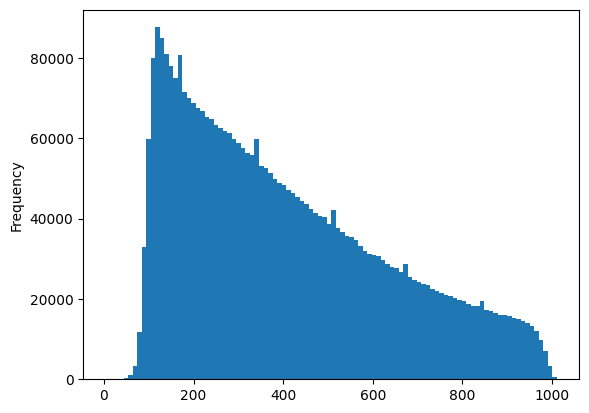

In [ ]:
train['length']=train['text'].apply(len)
train['length'].plot(bins=100,kind='hist')

In [ ]:
test['polarity'].value_counts()

,count
polarity,
1,200000
2,199999


<Axes: ylabel='Frequency'>

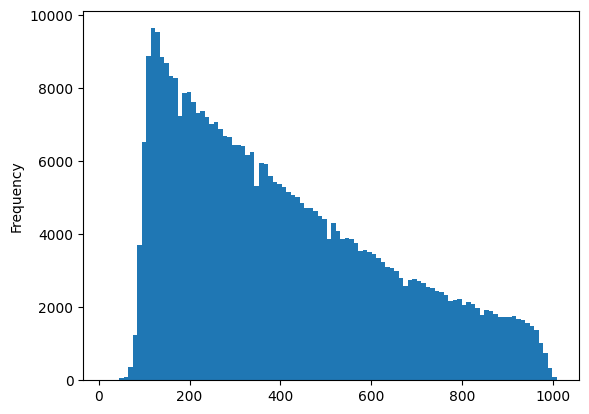

In [ ]:
test['length']=test['text'].apply(len)
test['length'].plot(bins=100,kind='hist')

In [ ]:
data=train,test
dataset=pd.concat(data)

In [ ]:
dataset.to_csv("AmazonReviews.csv")

In [ ]:
reads=pd.read_csv('AmazonReviews.csv')

In [ ]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999998 entries, 0 to 3999997
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   polarity    int64 
 2   title       object
 3   text        object
 4   length      int64 
dtypes: int64(3), object(2)
memory usage: 152.6+ MB


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset.to_csv('/content/drive/My Drive/AmazonReviews.csv', index=False)